# Neural Network From Scratch

This notebook implements a simple neural network from scratch using NumPy to classify handwritten digits from MNIST dataset.

In [1]:
# importing necessary libraries for numerical operations, data manipulation and plotting images
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt        

In [2]:
# importing the dataset from CSV file
data = pd.read_csv('/kaggle/input/mnist-dataset/mnist_train.csv')

In [3]:
data

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Converting the DataFrame to a NumPy array for easier manipulation
data = np.array(data)

In [5]:
# Getting the number of samples (m) and features (n)
m, n = data.shape

In [6]:
# Shuffling the data to ensure randomness in training
np.random.shuffle(data)

In [7]:
# Splitting the data into development and training sets
data_dev = data[0:1000].T         # Development set of 1000 samples
Y_dev = data_dev[0]               # Labels for the development set
X_dev = data_dev[1:n]             # Features for the development set
X_dev = X_dev / 255               # Normalizing the input data

data_train = data[1000:m].T       # Training set
Y_train = data_train[0]           # Labels for the training set
X_train = data_train[1:n]         # Features for the training set
X_train = X_train / 255           # Normalizing the input data

In [8]:
def initialize_parameters():
    """Initializes the parameters (weights and biases) for the neural network."""
    # Weight matrices are initialized randomly with values between -0.5 and 0.5
    W1 = np.random.rand(64, 784) - 0.5  # Weights for the first layer (64 neurons, 784 inputs)
    b1 = np.random.rand(64, 1) - 0.5    # Bias for the first layer
    W2 = np.random.rand(32, 64) - 0.5    # Weights for the second layer (32 neurons, 64 inputs)
    b2 = np.random.rand(32, 1) - 0.5    # Bias for the second layer
    W3 = np.random.rand(10, 32) - 0.5    # Weights for the output layer (10 neurons, 32 inputs)
    b3 = np.random.rand(10, 1) - 0.5    # Bias for the output layer
    return W1, b1, W2, b2, W3, b3



def ReLU(Z):
  """Applies the ReLU activation function."""
  return np.maximum(Z, 0)

def softmax(Z):
  """Applies the softmax activation function."""
  A = np.exp(Z) / sum(np.exp(Z))
  return A


def forward_prop(W1, b1, W2, b2, W3, b3, X):
    """Performs forward propagation through the neural network."""
    Z1 = W1.dot(X) + b1  # Linear transformation for the first layer
    A1 = ReLU(Z1)        # Activation function for the first layer
    Z2 = W2.dot(A1) + b2  # Linear transformation for the second layer
    A2 = ReLU(Z2)        # Activation function for the second layer
    Z3 = W3.dot(A2) + b3  # Linear transformation for the output layer
    A3 = softmax(Z3)     # Applying softmax to get output probabilities
    return Z1, A1, Z2, A2, Z3, A3

def ReLU_deriv(Z):
  """Calculates the derivative of the ReLU activation function."""
  return Z > 0


def one_hot(Y):
    """Converts the labels to one-hot encoding."""
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))  # Initialize a zero array
    one_hot_Y[np.arange(Y.size), Y] = 1           # Set the correct indices to 1
    one_hot_Y = one_hot_Y.T                       # Transpose the array for correct shape
    return one_hot_Y


def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    """Performs backward propagation to compute gradients."""
    one_hot_Y = one_hot(Y)  # Convert labels to one-hot encoding
    dZ3 = A3 - one_hot_Y     # Compute the gradient for the output layer
    dW3 = 1 / m * dZ3.dot(A2.T)  # Gradient for weights of output layer
    db3 = 1 / m * np.sum(dZ3)     # Gradient for biases of output layer

    # Backpropagate through the second layer
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)  # Gradient for weights of second layer
    db2 = 1 / m * np.sum(dZ2)     # Gradient for biases of second layer

    # Backpropagate through the first layer
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)    # Gradient for weights of first layer
    db1 = 1 / m * np.sum(dZ1)      # Gradient for biases of first layer

    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    """Updates the parameters using gradient descent."""
    W1 = W1 - alpha * dW1  # Update weights of the first layer
    b1 = b1 - alpha * db1   # Update biases of the first layer
    W2 = W2 - alpha * dW2   # Update weights of the second layer
    b2 = b2 - alpha * db2   # Update biases of the second layer
    W3 = W3 - alpha * dW3   # Update weights of the output layer
    b3 = b3 - alpha * db3   # Update biases of the output layer
    return W1, b1, W2, b2, W3, b3

In [9]:
def get_predictions(A3):
    """Returns the predicted classes based on the softmax output."""
    return np.argmax(A3, 0)  # Returns the index of the maximum probability for each sample


def get_accuracy(predictions, Y):
    """Calculates the accuracy of the model."""
    print(predictions, Y)  # Optional: Print predictions and true labels for inspection
    return np.sum(predictions == Y) / Y.size  # Calculate the ratio of correct predictions


def gradient_descent(X, Y, alpha, iterations):
    """Trains the neural network using gradient descent."""
    W1, b1, W2, b2, W3, b3 = initialize_parameters()  # Initialize parameters
    for i in range(1, iterations+1):
        # Forward propagation
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)

        # Backward propagation
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)

        # Update parameters
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)

        # Print the progress every 50 iterations
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            print("Accuracy: ", get_accuracy(predictions, Y))

    return W1, b1, W2, b2, W3, b3

In [10]:
# Training the neural network on the training set
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.2, 500)

Iteration:  50
[9 2 1 ... 3 1 6] [9 2 1 ... 6 1 6]
Accuracy:  0.7432668350311022
Iteration:  100
[9 2 1 ... 6 1 6] [9 2 1 ... 6 1 6]
Accuracy:  0.8348107595043984
Iteration:  150
[9 2 1 ... 6 1 6] [9 2 1 ... 6 1 6]
Accuracy:  0.8673706334005661
Iteration:  200
[9 2 1 ... 6 1 6] [9 2 1 ... 6 1 6]
Accuracy:  0.8849133036153155
Iteration:  250
[9 2 1 ... 6 1 6] [9 2 1 ... 6 1 6]
Accuracy:  0.8968796081289513
Iteration:  300
[9 2 1 ... 6 1 6] [9 2 1 ... 6 1 6]
Accuracy:  0.9052526314005322
Iteration:  350
[9 2 1 ... 6 1 6] [9 2 1 ... 6 1 6]
Accuracy:  0.9117781657316226
Iteration:  400
[9 2 1 ... 6 1 6] [9 2 1 ... 6 1 6]
Accuracy:  0.9169816437566738
Iteration:  450
[9 2 1 ... 6 1 6] [9 2 1 ... 6 1 6]
Accuracy:  0.9218291835454838
Iteration:  500
[9 2 1 ... 6 1 6] [9 2 1 ... 6 1 6]
Accuracy:  0.9255072119866439


In [11]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
  """Generates predictions for the input data using the trained network."""
  _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
  predictions = get_predictions(A3)
  return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    """Tests the model's prediction for a specific image index."""
    current_image = X_train[:, index, None]  # Get the current image (column vector)
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)  # Get prediction for the current image
    label = Y_train[index]  # Get the true label for the current image
    print("Prediction: ", prediction)  # Print the predicted class
    print("Label: ", label)  # Print the true label

    # Reshape the image for displaying and scale back to 0-255
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()  # Set the colormap to gray
    plt.imshow(current_image, interpolation='nearest')  # Display the image
    plt.show()  # Show the plot


Prediction:  [2]
Label:  2


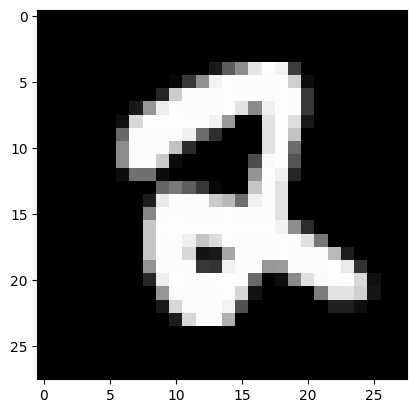

Prediction:  [9]
Label:  9


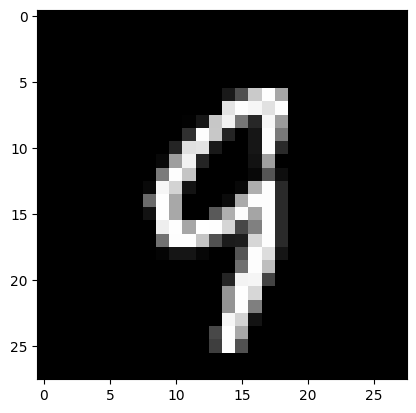

Prediction:  [8]
Label:  8


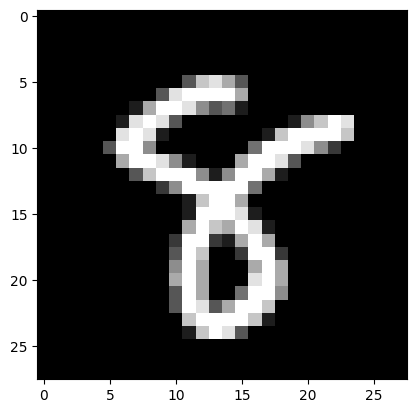

Prediction:  [5]
Label:  5


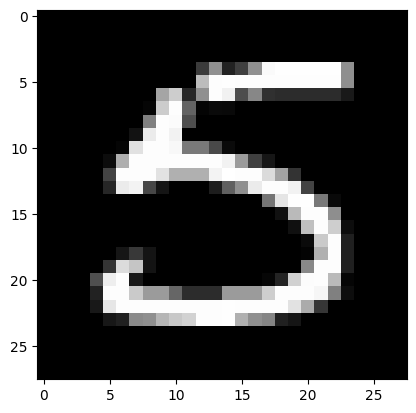

Prediction:  [9]
Label:  9


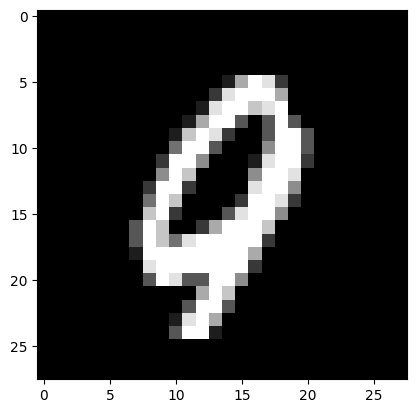

Prediction:  [6]
Label:  6


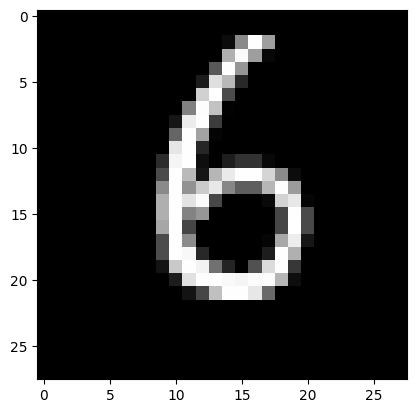

Prediction:  [0]
Label:  0


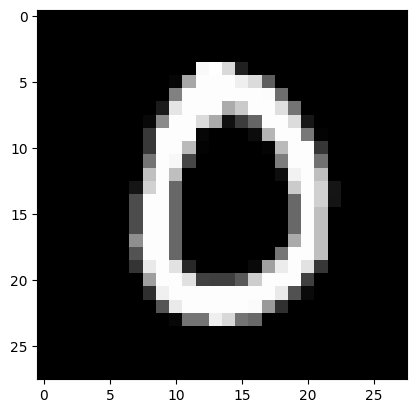

Prediction:  [6]
Label:  5


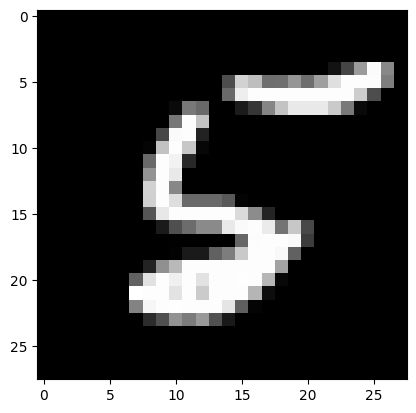

Prediction:  [0]
Label:  0


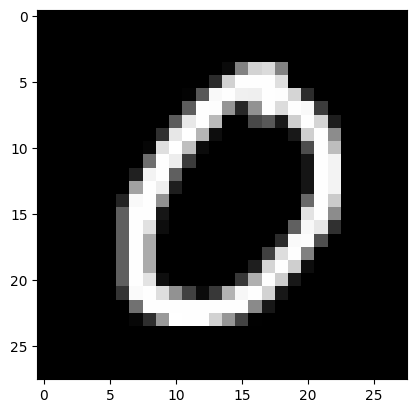

Prediction:  [5]
Label:  5


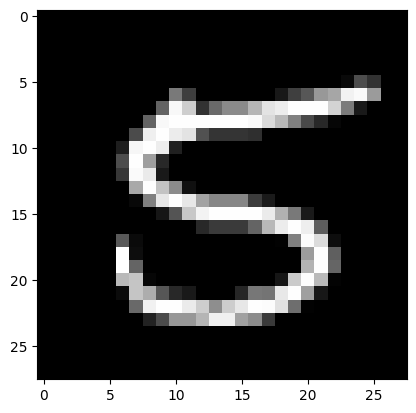

In [12]:
indexes = [1,50,100,150,200,250,300,350,400,450]
for i in indexes:
  test_prediction(i, W1, b1, W2, b2, W3, b3)

In [13]:
# Finally, let's find the accuracy on the dev set:

dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
get_accuracy(dev_predictions, Y_dev)

[5 8 2 4 8 8 2 6 2 6 8 9 1 1 6 4 0 1 1 3 7 4 3 9 1 9 5 8 9 8 9 4 2 5 2 7 6
 0 1 0 7 8 4 0 9 3 0 8 6 8 1 2 2 0 8 0 1 4 1 0 4 2 8 7 5 9 6 2 2 1 0 3 6 7
 0 8 5 3 7 2 0 2 8 5 5 2 0 9 6 7 2 1 1 2 9 6 6 2 6 6 4 3 9 6 5 3 6 8 1 2 4
 0 4 0 3 6 2 1 0 1 1 0 6 8 7 0 9 6 1 3 2 7 8 7 6 3 6 6 9 7 0 6 5 8 0 8 5 1
 1 6 1 6 9 6 3 8 3 9 1 6 0 7 9 5 7 5 6 5 9 5 3 8 0 1 8 7 3 9 7 1 3 2 1 3 4
 9 3 8 4 1 2 4 0 9 7 3 1 9 3 8 0 9 9 4 1 1 2 0 2 2 6 7 2 8 6 2 6 3 9 4 0 6
 1 0 2 7 0 7 9 3 9 6 2 9 8 5 7 0 1 9 5 2 9 2 1 4 4 3 0 1 0 8 9 5 4 8 5 4 3
 0 5 1 2 3 5 2 3 4 4 1 1 3 3 1 3 4 6 7 8 7 2 5 5 3 0 8 7 2 9 6 8 7 1 7 6 5
 6 7 7 0 5 4 1 7 2 9 1 9 5 2 4 9 6 8 8 9 3 5 7 2 4 4 6 1 0 3 8 2 0 3 7 6 5
 1 8 3 6 9 7 7 8 4 0 0 9 2 6 3 7 6 0 5 2 1 1 8 3 7 9 5 5 0 1 9 0 3 7 5 5 1
 6 1 2 4 9 0 3 4 5 7 2 4 6 8 1 9 1 6 7 4 3 1 9 1 8 5 1 8 4 0 7 9 6 3 3 0 4
 9 0 1 7 6 1 2 8 1 6 7 1 5 2 5 7 3 7 2 9 7 7 8 9 1 4 6 9 3 5 7 6 6 3 1 2 2
 9 9 9 8 7 1 7 2 5 1 9 6 0 2 9 3 5 5 9 1 6 3 2 8 8 1 2 3 4 9 1 1 2 9 4 7 1
 5 0 8 1 3 2 8 5 8 2 8 2 

0.925

In [14]:
# Importing test data
test_data = pd.read_csv('/kaggle/input/mnist-dataset/mnist_test.csv')

In [15]:
# Converting the test data to a NumPy array
test_data = np.array(test_data)

In [16]:
# Getting the number of samples (m_test) and features (n_test) from the test dataset
m_test, n_test = test_data.shape

In [17]:
# Preparing the test data
test_data_dev = test_data.T  # Transposing the test data for easier indexing
Y_test = test_data_dev[0]    # Labels for the test set
X_test = test_data_dev[1:n_test]  # Features for the test set
X_test = X_test / 255         # Normalizing the test input data (values between 0 and 1)


In [18]:
# Making predictions on the test set and calculating accuracy
test_data_predictions = make_predictions(X_test, W1, b1, W2, b2, W3, b3)  # Get predictions for the test set
test_accuracy = get_accuracy(test_data_predictions, Y_test)  # Calculate accuracy for the test set
print("Test Set Accuracy: ", test_accuracy)  # Print the accuracy

[2 1 0 ... 4 8 6] [2 1 0 ... 4 5 6]
Test Set Accuracy:  0.9206920692069207
